# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [37]:
#Import from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [39]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

In [40]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [41]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('/content/drive/MyDrive/EDA Ass/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA Ass/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list =  [file for file in os.listdir() if file.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

         # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
          daily_data = monthly_data[monthly_data['date'] == date]
          # Iterate through each hour of the selected date
          for hour in daily_data['hour'].unique():
            hourly_data = daily_data[daily_data['hour'] == hour]
            # Sample 5% of the hourly data randomly
            sample = hourly_data.sample(frac=0.05, random_state=42)
            # Append the sampled data to the current date's dataframe
            # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, sample])

        # Append the sampled data of this date to the final dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file ~$2023-2.parquet: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [43]:
# reduce the total entires to 300000
df= df.sample(n=300000, random_state=42)

In [44]:
# final data with 300000 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 167042 to 2810111
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289632 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289632 non-null  float64       
 6   store_and_fwd_flag     289632 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

In [45]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('/content/drive/MyDrive/EDA Ass/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [46]:
# Load the new data file
# Load the new data file
tripdata_df = pd.read_parquet('/content/drive/MyDrive/EDA Ass/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records.parquet')
tripdata_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 167042 to 2810111
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289632 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289632 non-null  float64       
 6   store_and_fwd_flag     289632 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

In [47]:
# df.head()
tripdata_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
167042,2,2023-10-02 18:23:48,2023-10-02 18:43:03,1.0,2.29,1.0,N,100,143,1,...,0.5,1.00,0.0,1.0,25.20,2.5,NaN,2023-10-02,18,0.0
800235,2,2023-01-10 09:36:36,2023-01-10 09:44:45,1.0,1.59,1.0,N,137,229,2,...,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,9,NaN
860977,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,0.5,0.00,0.0,1.0,15.70,2.5,NaN,2023-07-11,20,0.0
1153076,2,2023-04-12 14:26:26,2023-04-12 14:33:40,1.0,0.00,1.0,N,140,140,2,...,0.5,0.00,0.0,1.0,4.50,0.0,NaN,2023-04-12,14,0.0
879090,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.5,7.05,0.0,1.0,35.35,0.0,NaN,2023-12-08,15,0.0


In [48]:
# df.info()
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 167042 to 2810111
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289632 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289632 non-null  float64       
 6   store_and_fwd_flag     289632 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [49]:
# Fix the index and drop any columns that are not needed
tripdata_df.drop(columns=['date'],inplace= True)
tripdata_df.drop(columns=['hour'],inplace= True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [50]:
# Combine the two airport fee columns
dup_cols = ['Airport_fee', 'airport_fee']
if all(col in tripdata_df.columns for col in dup_cols):
  tripdata_df['Airport_fee'] = tripdata_df[dup_cols].sum(axis=1, skipna=True)
  tripdata_df.drop(columns=['airport_fee'],inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [51]:
# check where values of fare amount are negative

neg_f_amt = tripdata_df[tripdata_df['fare_amount'] < 0]
print(neg_f_amt)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [52]:
# Analyse RatecodeID for the negative fare amounts

neg_f_amt['RatecodeID'].unique()

array([], dtype=float64)

In [53]:
# Find which columns have negative values

num_col = tripdata_df.select_dtypes(include=['number'])
neg_col = num_col.columns[(num_col < 0).any()].tolist()
print("Columns containing negative values:", neg_col)

Columns containing negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [54]:
# fix these negative values

tripdata_df[neg_col] = tripdata_df[neg_col].applymap(lambda x: 0 if x < 0 else x)
print((tripdata_df[neg_col]<0).sum())

mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [55]:
# Find the proportion of missing values in each column

tripdata_df.isnull().mean() * 100

,0
VendorID,0.000
tpep_pickup_datetime,0.000
tpep_dropoff_datetime,0.000
passenger_count,3.456
trip_distance,0.000
RatecodeID,3.456
store_and_fwd_flag,3.456
PULocationID,0.000
DOLocationID,0.000
payment_type,0.000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [56]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
tripdata_df['passenger_count'].fillna(tripdata_df['passenger_count'].mode()[0],inplace=True)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [59]:
# Fix missing values in 'RatecodeID'
tripdata_df['RatecodeID'].fillna(tripdata_df['RatecodeID'].mode()[0],inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [60]:
# handle null values in congestion_surcharge

tripdata_df['congestion_surcharge'].fillna(tripdata_df['congestion_surcharge'].mode()[0],inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [61]:
# Handle any remaining missing values

tripdata_df['store_and_fwd_flag'].fillna(tripdata_df['store_and_fwd_flag'].mode()[0],inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [62]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

num_cols = tripdata_df.select_dtypes(include=['number'])
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR))).sum()
print("Number of potential outliers in each column:\n",outliers)



Number of potential outliers in each column:
 VendorID                    78
passenger_count          71525
trip_distance            39262
RatecodeID               16042
PULocationID                 0
DOLocationID                 0
payment_type             63863
fare_amount              30950
extra                     5437
mta_tax                   2792
tip_amount               22722
tolls_amount             24267
improvement_surcharge      336
total_amount             34638
congestion_surcharge     22014
Airport_fee              25294
dtype: int64


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [63]:
# remove passenger_count > 6
tripdata_df = tripdata_df[tripdata_df['passenger_count'] <= 6]

In [64]:
# Continue with outlier handling

tripdata_df = tripdata_df[~((tripdata_df['trip_distance'] < 0.1) & (tripdata_df['fare_amount'] > 300))]

In [65]:
# Do any columns need standardising?
valid_payment_types = [1, 2, 3, 4, 5, 6]
most_common_payment = tripdata_df[tripdata_df['payment_type'].isin(valid_payment_types)]['payment_type'].mode()[0]
tripdata_df['payment_type'] = tripdata_df['payment_type'].apply(lambda x: most_common_payment if x == 0 else x)


In [66]:
upper_limit = tripdata_df['trip_distance'].quantile(0.99)
tripdata_df['trip_distance'] = tripdata_df['trip_distance'].clip(upper=upper_limit)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
tripdata_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

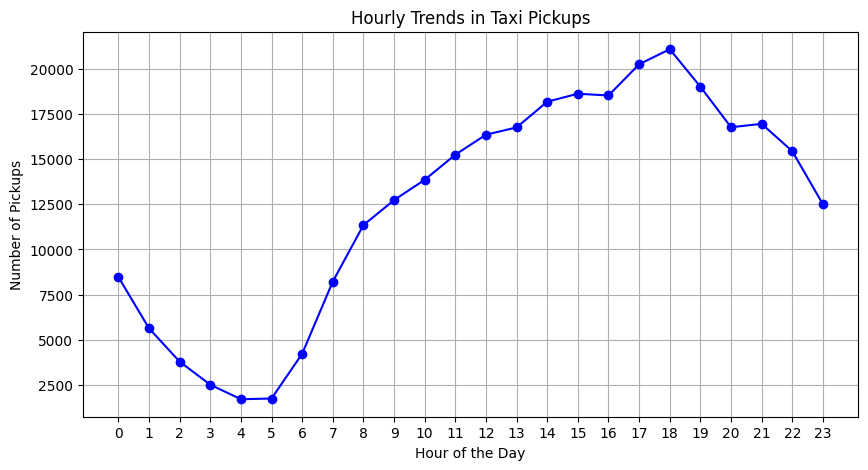

In [68]:
# Find and show the hourly trends in taxi pickups
#Extracting Hour from pickup time
tripdata_df['pickup_hour'] = tripdata_df['tpep_pickup_datetime'].dt.hour

#Counting number of pickups per hour
hourly_trends = tripdata_df['pickup_hour'].value_counts().sort_index()

#Visualising Trend using bar plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_trends.index, hourly_trends.values, marker='o', linestyle='-', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid(True)
plt.show()

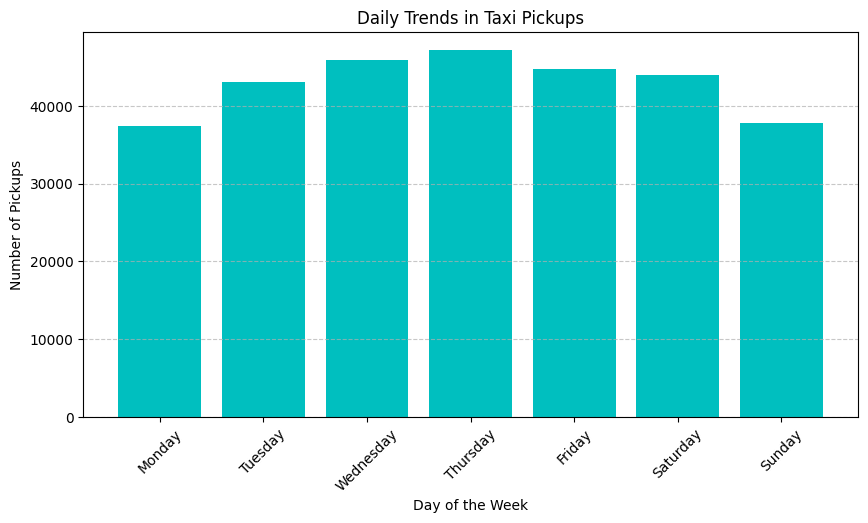

In [69]:
# Find and show the daily trends in taxi pickups (days of the week)

#Extracting the day details
tripdata_df['pickup_day'] = tripdata_df['tpep_pickup_datetime'].dt.dayofweek

tripdata_df['pickup_day_name'] = tripdata_df['tpep_pickup_datetime'].dt.day_name()

#Counting pickups per day
daily_trends = tripdata_df['pickup_day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

#Visualising the data
plt.figure(figsize=(10, 5))
plt.bar(daily_trends.index, daily_trends.values, color='c')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


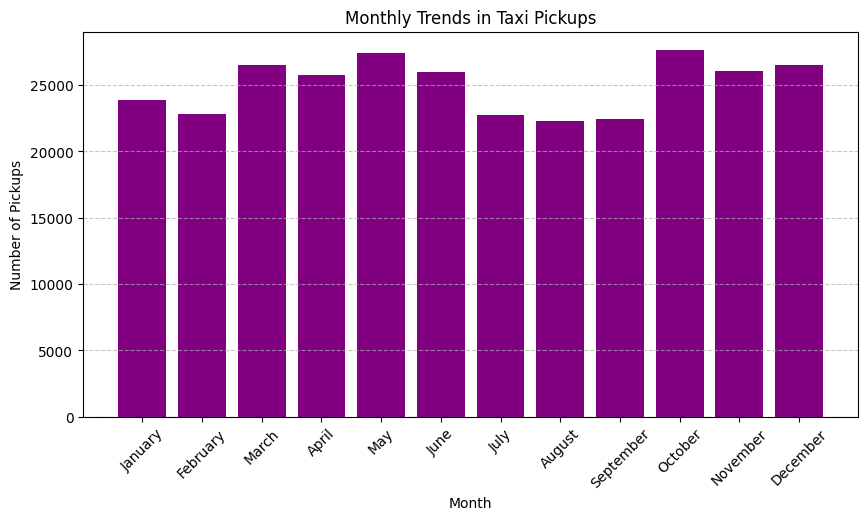

In [70]:
# Show the monthly trends in pickups
tripdata_df['pickup_month'] = tripdata_df['tpep_pickup_datetime'].dt.month
tripdata_df['pickup_month_name'] = tripdata_df['tpep_pickup_datetime'].dt.strftime('%B')

#Counting pickups per month
monthly_trends = tripdata_df['pickup_month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

#Visualising the data
plt.figure(figsize=(10, 5))
plt.bar(monthly_trends.index, monthly_trends.values, color='purple')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [71]:
# Analyse the above parameters

fin_col = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in fin_col:
    zero_values = (tripdata_df[col] == 0).sum()
    negative_values = (tripdata_df[col] < 0).sum()
    print(f"{col}: {zero_values} zero values, {negative_values} negative values")

fare_amount: 84 zero values, 0 negative values
tip_amount: 68860 zero values, 0 negative values
total_amount: 44 zero values, 0 negative values
trip_distance: 5986 zero values, 0 negative values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [72]:
# Create a df with non zero entries for the selected parameters.
tripdata_df_filtered = tripdata_df[
    (tripdata_df['trip_distance'] > 0) &
    (tripdata_df['fare_amount'] > 0) &
    (tripdata_df['total_amount'] > 0)
].copy()
tripdata_df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 293961 entries, 167042 to 2810111
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               293961 non-null  int64         
 1   tpep_pickup_datetime   293961 non-null  datetime64[us]
 2   tpep_dropoff_datetime  293961 non-null  datetime64[us]
 3   passenger_count        293961 non-null  float64       
 4   trip_distance          293961 non-null  float64       
 5   RatecodeID             293961 non-null  float64       
 6   store_and_fwd_flag     293961 non-null  object        
 7   PULocationID           293961 non-null  int64         
 8   DOLocationID           293961 non-null  int64         
 9   payment_type           293961 non-null  int64         
 10  fare_amount            293961 non-null  float64       
 11  extra                  293961 non-null  float64       
 12  mta_tax                293961 non-null  flo

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

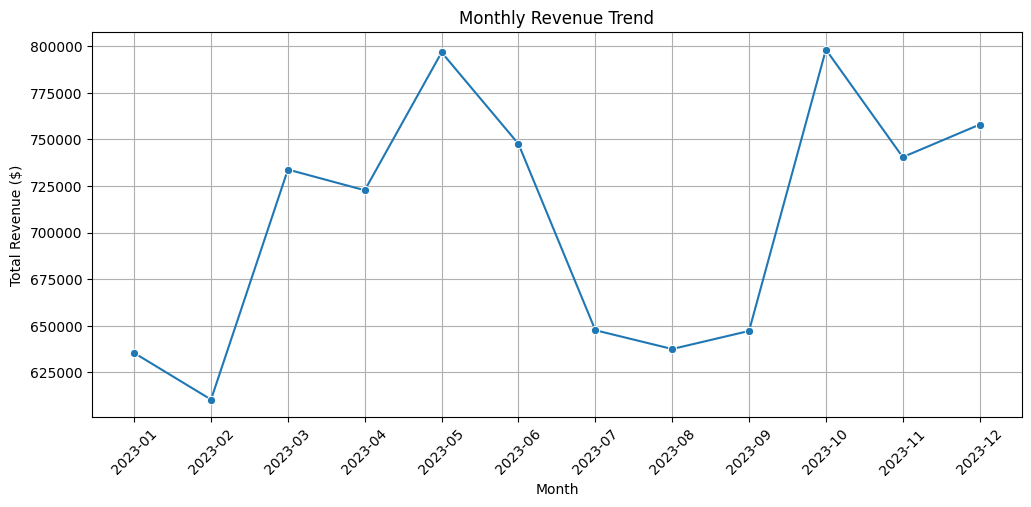

In [73]:
# Group data by month and analyse monthly revenue
tripdata_df_filtered['month'] = tripdata_df_filtered['tpep_pickup_datetime'].dt.to_period('M')
monthly_revenue = tripdata_df_filtered.groupby('month')['total_amount'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='month', y='total_amount', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

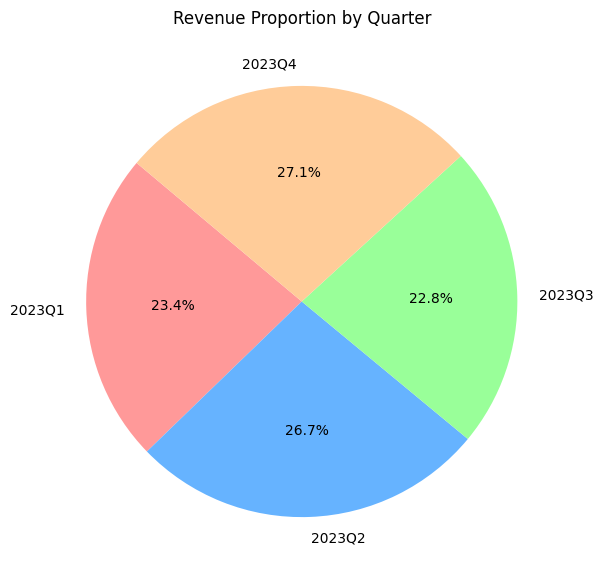

In [74]:
# Calculate proportion of each quarter
tripdata_df_filtered['quarter'] = tripdata_df_filtered['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = tripdata_df_filtered.groupby('quarter')['total_amount'].sum().reset_index()
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

plt.figure(figsize=(7, 7))
plt.pie(quarterly_revenue['proportion'], labels=quarterly_revenue['quarter'],
        autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Revenue Proportion by Quarter')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

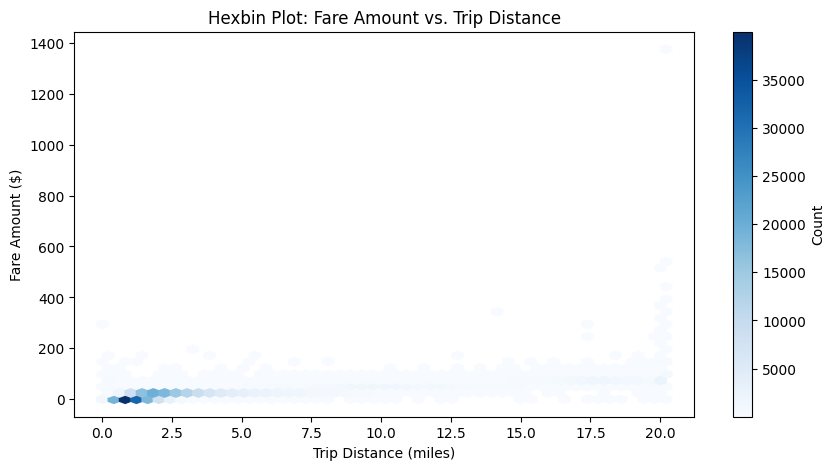

Correlation between trip distance and fare amount: 0.9189


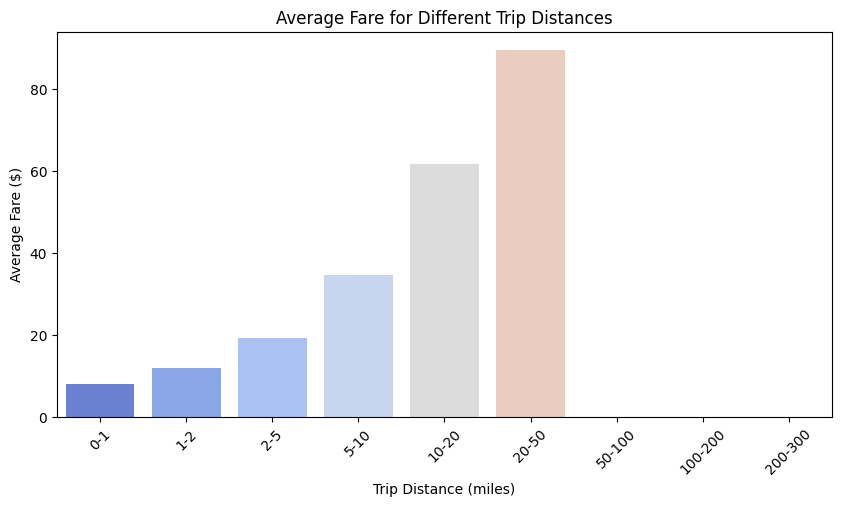

In [75]:
# Show how trip fare is affected by distance
tripdata_df_filtered = tripdata_df[tripdata_df['trip_distance'] > 0]

# HexBin Density correlation
plt.figure(figsize=(10, 5))
plt.hexbin(tripdata_df_filtered['trip_distance'], tripdata_df_filtered['fare_amount'],
           gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Hexbin Plot: Fare Amount vs. Trip Distance')
plt.show()

# Calculate correlation
correlation = tripdata_df_filtered['trip_distance'].corr(tripdata_df_filtered['fare_amount'])
print(f'Correlation between trip distance and fare amount: {correlation:.4f}')

# Grouping trip_distance into bins for better analysis
bins = [0, 1, 2, 5, 10, 20, 50, 100, 200, 300]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-50', '50-100', '100-200', '200-300']
tripdata_df_filtered['distance_bin'] = pd.cut(tripdata_df_filtered['trip_distance'], bins=bins, labels=labels)

# Average fare for each distance range
fare_by_distance = tripdata_df_filtered.groupby('distance_bin')['fare_amount'].mean().reset_index()

# Bar plot for average fare per distance range
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_distance, x='distance_bin', y='fare_amount', palette='coolwarm')

plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Fare ($)')
plt.title('Average Fare for Different Trip Distances')
plt.xticks(rotation=45)
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [76]:
tripdata_df["trip_duration"] = (tripdata_df["tpep_dropoff_datetime"] - tripdata_df["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [77]:
tripdata_df = tripdata_df.drop_duplicates()

In [78]:
tripdata_df = tripdata_df.reset_index(drop=True)

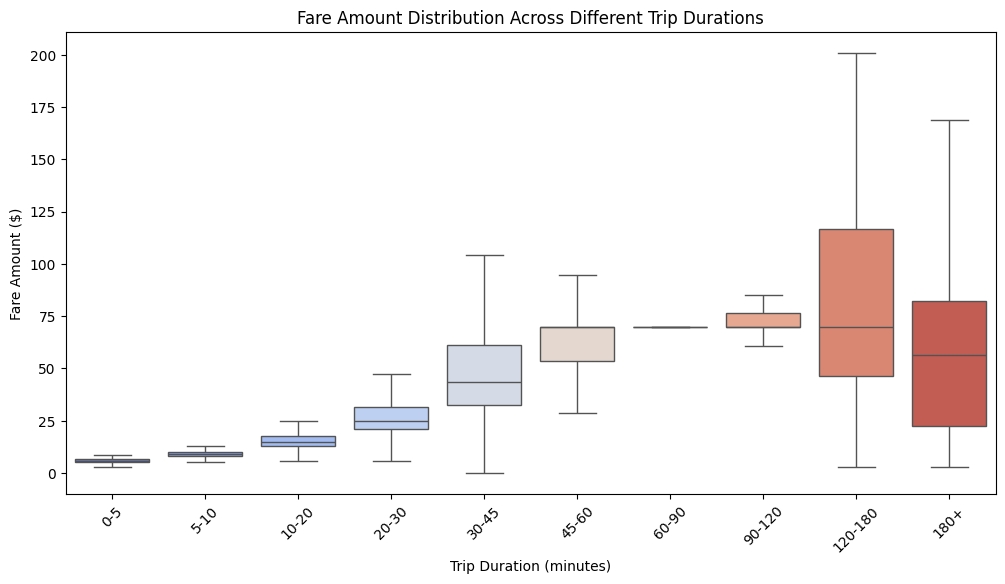

In [80]:
# Show relationship between fare and trip duration
# Create trip duration categories (bins)
bins = [0, 5, 10, 20, 30, 45, 60, 90, 120, 180, 500]  # Duration in minutes
labels = ["0-5", "5-10", "10-20", "20-30", "30-45", "45-60", "60-90", "90-120", "120-180", "180+"]
tripdata_df["duration_category"] = pd.cut(tripdata_df["trip_duration"], bins=bins, labels=labels)

# Set plot size
plt.figure(figsize=(12, 6))

# Box plot
sns.boxplot(x="duration_category", y="fare_amount", data=tripdata_df, showfliers=False, palette="coolwarm")

# Labels & title
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount Distribution Across Different Trip Durations")

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


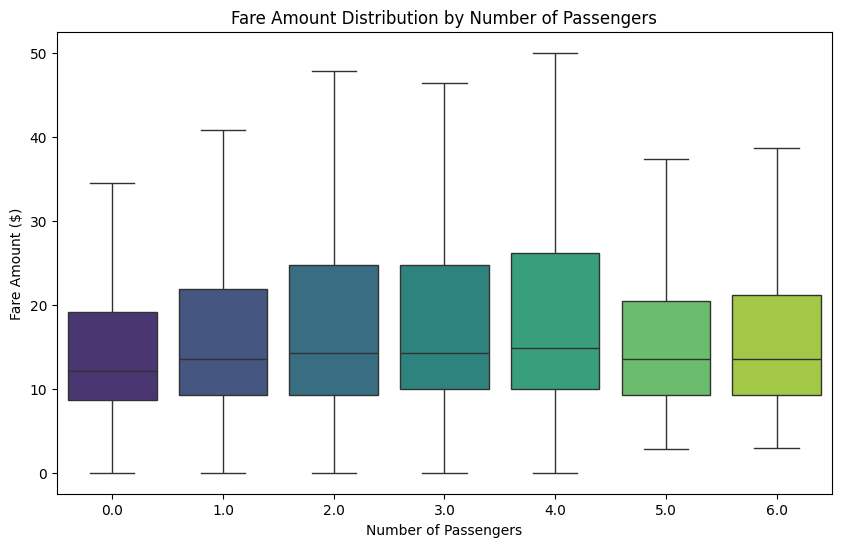

In [81]:
# Show relationship between fare and number of passengers
# Set plot size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x="passenger_count", y="fare_amount", data=tripdata_df, showfliers=False, palette="viridis")

# Labels & title
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount Distribution by Number of Passengers")

# Show plot
plt.show()

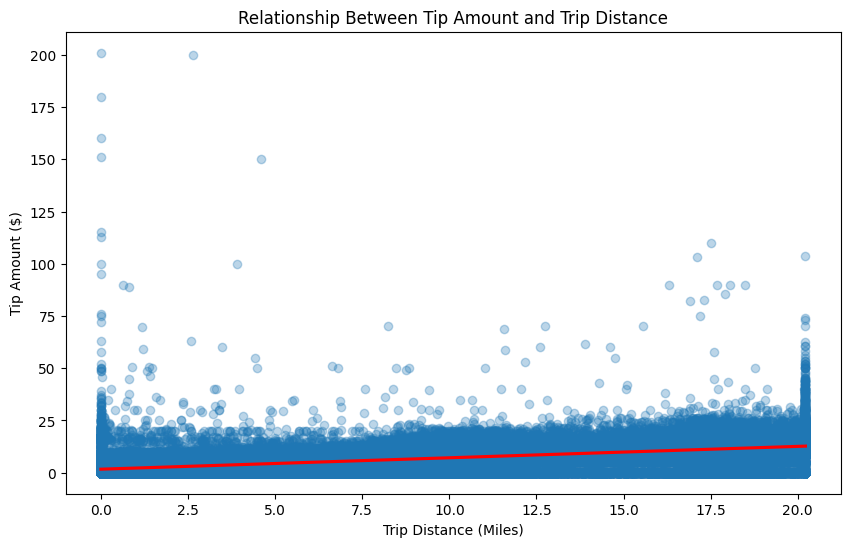

In [82]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x="trip_distance", y="tip_amount", data=tripdata_df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

# Labels & title
plt.xlabel("Trip Distance (Miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Tip Amount and Trip Distance")

# Show plot
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

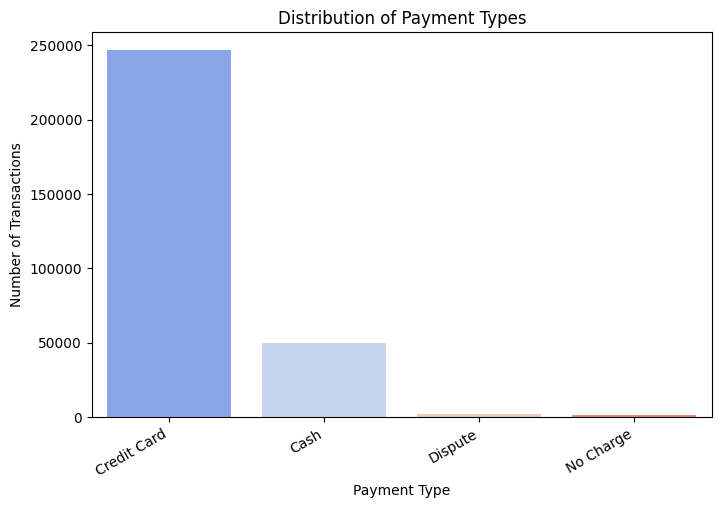

In [83]:
# Analyse the distribution of different payment types (payment_type).
# Count occurrences of each payment type
payment_counts = tripdata_df["payment_type"].value_counts()

# Define payment type labels
payment_labels = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Map labels to index
payment_counts.index = payment_counts.index.map(payment_labels)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="coolwarm")

# Add labels
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=30, ha="right")

# Show plot
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [84]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
taxi_zone = gpd.read_file('/content/drive/MyDrive/EDA Ass/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
taxi_zone.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


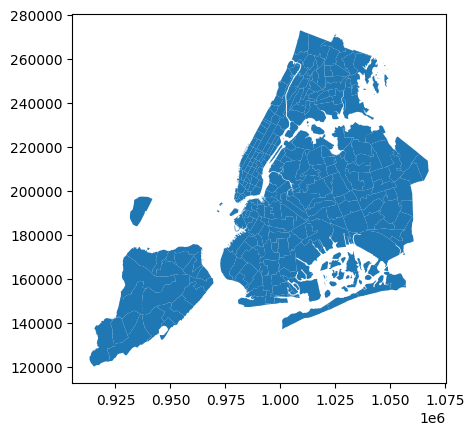

In [85]:
# print(zones.info())
# zones.plot()
print(taxi_zone.info())
taxi_zone.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [86]:
# Merge zones and trip records using locationID and PULocationID
# Merge with pickup location
tripdata_df = tripdata_df.merge(taxi_zone[['LocationID', 'zone', 'borough']],
                        left_on='PULocationID',
                        right_on='LocationID',
                        how='left',
                        suffixes=('', '_pickup'))

# Rename for clarity
tripdata_df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Merge with dropoff location
tripdata_df = tripdata_df.merge(taxi_zone[['LocationID', 'zone', 'borough']],
                        left_on='DOLocationID',
                        right_on='LocationID',
                        how='left',
                        suffixes=('', '_dropoff'))

# Rename for clarity
tripdata_df.rename(columns={'zone': 'dropoff_zone', 'borough': 'dropoff_borough'}, inplace=True)

# Drop duplicate LocationID columns
tripdata_df.drop(columns=['LocationID', 'LocationID_dropoff'], inplace=True)

# Display sample rows
tripdata_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day,pickup_day_name,pickup_month,pickup_month_name,trip_duration,duration_category,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough
0,2,2023-10-02 18:23:48,2023-10-02 18:43:03,1.0,2.29,1.0,N,100,143,1,...,0,Monday,10,October,19.250000,10-20,Garment District,Manhattan,Lincoln Square West,Manhattan
1,2,2023-01-10 09:36:36,2023-01-10 09:44:45,1.0,1.59,1.0,N,137,229,2,...,1,Tuesday,1,January,8.150000,5-10,Kips Bay,Manhattan,Sutton Place/Turtle Bay North,Manhattan
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,1,Tuesday,7,July,10.033333,10-20,Central Park,Manhattan,Upper West Side South,Manhattan
3,2,2023-04-12 14:26:26,2023-04-12 14:33:40,1.0,0.00,1.0,N,140,140,2,...,2,Wednesday,4,April,7.233333,5-10,Lenox Hill East,Manhattan,Lenox Hill East,Manhattan
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,4,Friday,12,December,20.250000,20-30,Morningside Heights,Manhattan,Washington Heights North,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [87]:
# Group data by location and calculate the number of trips
# Count trips by pickup location
pickup_count = tripdata_df.groupby(['pickup_zone', 'pickup_borough']).size().reset_index(name='pickup_trips')

# Count trips by dropoff location
dropoff_count = tripdata_df.groupby(['dropoff_zone', 'dropoff_borough']).size().reset_index(name='dropoff_trips')

# Merge pickup and dropoff counts
location_trip_count = pickup_count.merge(dropoff_count,
                                           left_on='pickup_zone',
                                           right_on='dropoff_zone',
                                           how='outer')

# Fill NaN values with 0
location_trip_count.fillna(0, inplace=True)

# Display top locations
location_trip_count.sort_values(by=['pickup_trips', 'dropoff_trips'], ascending=False).head(10)


,pickup_zone,pickup_borough,pickup_trips,dropoff_zone,dropoff_borough,dropoff_trips
120,JFK Airport,Queens,15334.0,JFK Airport,Queens,3554
228,Upper East Side South,Manhattan,13907.0,Upper East Side South,Manhattan,12357
153,Midtown Center,Manhattan,13814.0,Midtown Center,Manhattan,11589
227,Upper East Side North,Manhattan,12433.0,Upper East Side North,Manhattan,13110
154,Midtown East,Manhattan,10529.0,Midtown East,Manhattan,8463
179,Penn Station/Madison Sq West,Manhattan,10249.0,Penn Station/Madison Sq West,Manhattan,6456
130,LaGuardia Airport,Queens,10150.0,LaGuardia Airport,Queens,3947
134,Lincoln Square East,Manhattan,9986.0,Lincoln Square East,Manhattan,8342
221,Times Sq/Theatre District,Manhattan,9934.0,Times Sq/Theatre District,Manhattan,9342
162,Murray Hill,Manhattan,8937.0,Murray Hill,Manhattan,8879


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [88]:
# Merge trip counts back to the zones GeoDataFrame
# Merge trip counts with the GeoDataFrame using LocationID
geo_trip_data = taxi_zone.merge(location_trip_count,
                                 left_on='LocationID',
                                 right_on='pickup_zone',
                                 how='left')

# Fill NaN values with 0 (for zones without trips)
geo_trip_data['pickup_trips'].fillna(0, inplace=True)
geo_trip_data['dropoff_trips'].fillna(0, inplace=True)

# Create a total trips column
geo_trip_data['total_trips'] = geo_trip_data['pickup_trips'] + geo_trip_data['dropoff_trips']

# Display the updated GeoDataFrame
geo_trip_data.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_zone,pickup_borough,pickup_trips,dropoff_zone,dropoff_borough,dropoff_trips,total_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",NaN,NaN,0.0,NaN,NaN,0.0,0.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN,0.0,NaN,NaN,0.0,0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN,NaN,0.0,NaN,NaN,0.0,0.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",NaN,NaN,0.0,NaN,NaN,0.0,0.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN,NaN,0.0,NaN,NaN,0.0,0.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

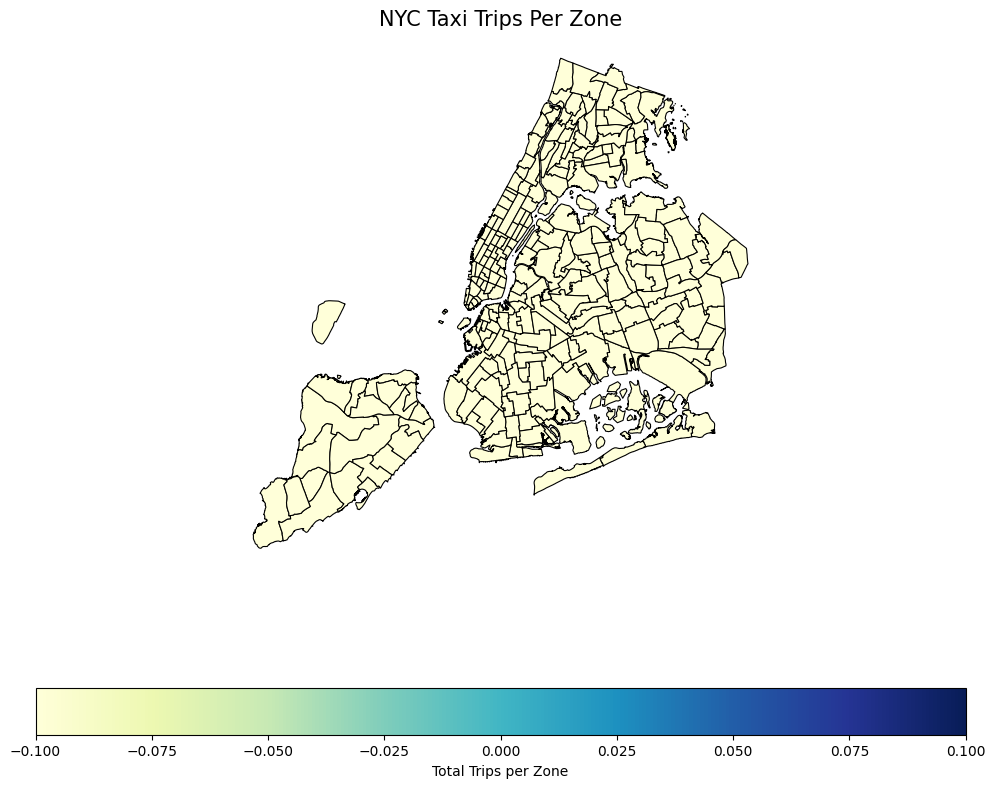

In [89]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the GeoDataFrame with trip count per zone
geo_trip_data.plot(
    column='total_trips',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"},
    ax=ax
)

# Add title
ax.set_title("NYC Taxi Trips Per Zone", fontsize=15)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Show the plot
plt.show()

In [91]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort zones by number of trips in descending order
sorted_zones = geo_trip_data.sort_values(by='total_trips', ascending=False)

# Display the top 10 zones
sorted_zones[['zone', 'borough', 'total_trips']].head(10)



,zone,borough,total_trips
0,Newark Airport,EWR,0.0
165,Morningside Heights,Manhattan,0.0
167,Mott Haven/Port Morris,Bronx,0.0
168,Mount Hope,Bronx,0.0
169,Murray Hill,Manhattan,0.0
170,Murray Hill-Queens,Queens,0.0
171,New Dorp/Midland Beach,Staten Island,0.0
172,North Corona,Queens,0.0
173,Norwood,Bronx,0.0
174,Oakland Gardens,Queens,0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

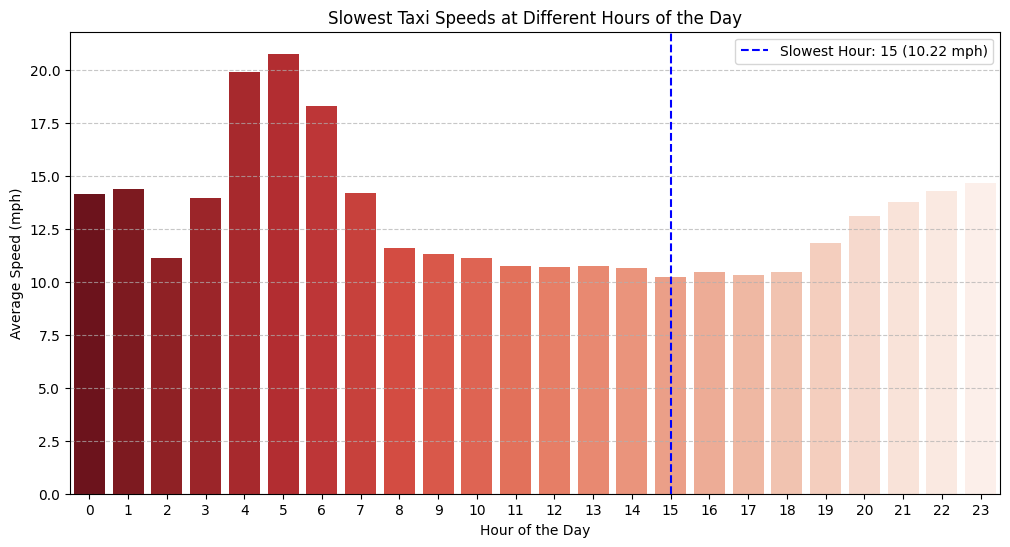

In [92]:
# Find routes which have the slowest speeds at different times of the day
# Calculate trip duration in hours
tripdata_df["trip_duration_hours"] = (tripdata_df["tpep_dropoff_datetime"] - tripdata_df["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# Group by pickup hour and calculate average speed
speed_per_hour = tripdata_df.groupby("pickup_hour").apply(lambda x: (x["trip_distance"].sum() / x["trip_duration_hours"].sum()))

# Sort speeds to find the slowest hours
slowest_hours = speed_per_hour.sort_values(ascending=True)

# Find the slowest hour
slowest_hour = slowest_hours.idxmin()
slowest_speed = slowest_hours.min()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=slowest_hours.index, y=slowest_hours.values, palette="Reds_r")

# Highlight slowest hour
plt.axvline(x=slowest_hour, color='blue', linestyle='--', label=f'Slowest Hour: {slowest_hour} ({slowest_speed:.2f} mph)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Average Speed (mph)")
plt.title("Slowest Taxi Speeds at Different Hours of the Day")
plt.xticks(range(24))  # Show all hours
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

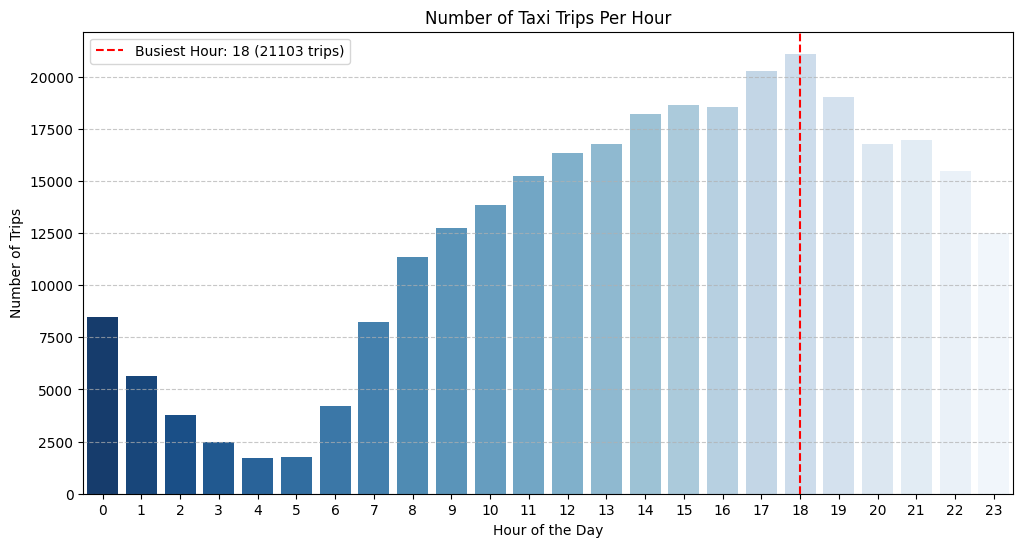

In [93]:
# Visualise the number of trips per hour and find the busiest hour
# Group data by pickup hour and count trips
trips_per_hour = tripdata_df.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_trips = trips_per_hour.max()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette="Blues_r")

# Highlight busiest hour
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Number of Taxi Trips Per Hour")
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [94]:
tripdata_df_filtered = tripdata_df[
    (tripdata_df['trip_distance'] > 0) &
    (tripdata_df['fare_amount'] > 0) &
    (tripdata_df['total_amount'] > 0)
].copy()
tripdata_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294064 entries, 0 to 300104
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               294064 non-null  int64         
 1   tpep_pickup_datetime   294064 non-null  datetime64[us]
 2   tpep_dropoff_datetime  294064 non-null  datetime64[us]
 3   passenger_count        294064 non-null  float64       
 4   trip_distance          294064 non-null  float64       
 5   RatecodeID             294064 non-null  float64       
 6   store_and_fwd_flag     294064 non-null  object        
 7   PULocationID           294064 non-null  int64         
 8   DOLocationID           294064 non-null  int64         
 9   payment_type           294064 non-null  int64         
 10  fare_amount            294064 non-null  float64       
 11  extra                  294064 non-null  float64       
 12  mta_tax                294064 non-null  float64  

In [95]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Define the sampling fraction (adjust if different)
sample_fraction = 0.05

# Scale up the trip counts
scaled_trip_counts = tripdata_df_filtered.groupby('pickup_hour')['VendorID'].count() / sample_fraction

# Convert to DataFrame for better visualization
scaled_trip_counts = scaled_trip_counts.reset_index()
scaled_trip_counts.columns = ['pickup_hour', 'scaled_trip_count']

# Display the top 5 busiest hours
scaled_trip_counts.sort_values(by='scaled_trip_count', ascending=False).head(5)





,pickup_hour,scaled_trip_count
18,18,414500.0
17,17,397800.0
19,19,373720.0
15,15,366320.0
16,16,364120.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [96]:
tripdata_df_filtered['pickup_day_name'] = tripdata_df_filtered['tpep_pickup_datetime'].dt.day_name()

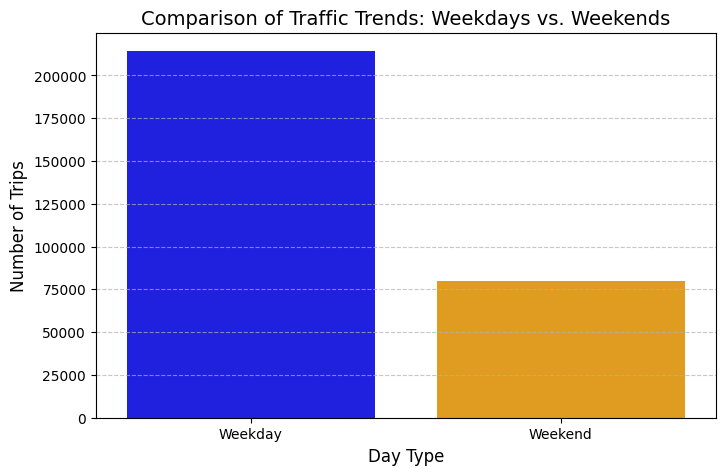

In [97]:
# Compare traffic trends for the week days and weekends
# Categorize days into weekday/weekend
tripdata_df_filtered['day_type'] = tripdata_df_filtered['pickup_day_name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Group and count trips
weekday_vs_weekend = tripdata_df_filtered.groupby('day_type')['VendorID'].count().reset_index()
weekday_vs_weekend.columns = ['day_type', 'trip_count']

# Plot the trend
plt.figure(figsize=(8,5))
sns.barplot(x='day_type', y='trip_count', data=weekday_vs_weekend, palette=['blue', 'orange'])

# Labels and title
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Comparison of Traffic Trends: Weekdays vs. Weekends', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [98]:
# Find top 10 pickup and dropoff zones
# Count pickups by zone
top_pickup_zones = tripdata_df_filtered['PULocationID'].value_counts().head(10)
print("Top Ten Pickup Zones are",top_pickup_zones)
# Count dropoffs by zone
top_dropoff_zones = tripdata_df_filtered['DOLocationID'].value_counts().head(10)
print("Top ten Drop off Zone are",top_dropoff_zones)



Top Ten Pickup Zones are PULocationID
132    15002
237    13776
161    13670
236    12302
162    10438
186    10140
138    10064
142     9868
230     9774
170     8811
Name: count, dtype: int64
Top ten Drop off Zone are DOLocationID
236    12990
237    12229
161    11459
230     9177
170     8764
162     8353
142     8228
239     8196
141     7841
68      7519
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [99]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups and dropoffs per zone
pickup_counts = tripdata_df.groupby("PULocationID").size().rename("pickup_count")
dropoff_counts = tripdata_df.groupby("DOLocationID").size().rename("dropoff_count")

# Merge pickup and dropoff counts
zone_counts = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(1)  # Fill missing values with 1 to avoid division by zero

# Compute pickup/dropoff ratio
zone_counts["pickup_dropoff_ratio"] = zone_counts["pickup_count"] / zone_counts["dropoff_count"]

# Get top 10 zones with highest ratios
top_10_ratios = zone_counts.nlargest(10, "pickup_dropoff_ratio")

# Get bottom 10 zones with lowest ratios
bottom_10_ratios = zone_counts.nsmallest(10, "pickup_dropoff_ratio")

# Display results
print("Top 10 Pickup/Dropoff Ratios:\n", top_10_ratios)
print("\nBottom 10 Pickup/Dropoff Ratios:\n", bottom_10_ratios)



Top 10 Pickup/Dropoff Ratios:
      pickup_count  dropoff_count  pickup_dropoff_ratio
70         1317.0            166              7.933735
132       15334.0           3554              4.314575
138       10150.0           3947              2.571573
186       10249.0           6456              1.587515
43         4991.0           3598              1.387160
114        3961.0           2862              1.383997
249        6628.0           4966              1.334676
162       10529.0           8463              1.244121
142        9986.0           8342              1.197075
161       13814.0          11589              1.191992

Bottom 10 Pickup/Dropoff Ratios:
      pickup_count  dropoff_count  pickup_dropoff_ratio
1            30.0            893              0.033595
252           2.0             54              0.037037
257           5.0            127              0.039370
160           4.0             90              0.044444
128           1.0             22              0.045455

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [100]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter trips during night hours (11 PM to 5 AM)
night_trips = tripdata_df[(tripdata_df["pickup_hour"] >= 23) | (tripdata_df["pickup_hour"] <= 5)]

# Count pickups and dropoffs during night hours
night_pickup_counts = night_trips.groupby("PULocationID").size().rename("night_pickup_count")
night_dropoff_counts = night_trips.groupby("DOLocationID").size().rename("night_dropoff_count")

# Merge pickup and dropoff counts
night_zone_counts = pd.concat([night_pickup_counts, night_dropoff_counts], axis=1).fillna(0)

# Get top 10 pickup zones at night
top_10_night_pickups = night_zone_counts.nlargest(10, "night_pickup_count")

# Get top 10 dropoff zones at night
top_10_night_dropoffs = night_zone_counts.nlargest(10, "night_dropoff_count")

# Display results
print("Top 10 Pickup Zones at Night (11 PM - 5 AM):\n", top_10_night_pickups)
print("\nTop 10 Dropoff Zones at Night (11 PM - 5 AM):\n", top_10_night_dropoffs)



Top 10 Pickup Zones at Night (11 PM - 5 AM):
      night_pickup_count  night_dropoff_count
79               2595.0                 1365
132              2280.0                  357
249              2072.0                  794
48               1690.0                 1152
148              1662.0                  748
114              1464.0                  417
230              1367.0                  810
186              1157.0                  581
68               1018.0                  973
164              1010.0                  627

Top 10 Dropoff Zones at Night (11 PM - 5 AM):
      night_pickup_count  night_dropoff_count
79               2595.0                 1365
48               1690.0                 1152
170               658.0                 1077
68               1018.0                  973
107               894.0                  929
141               599.0                  870
263               604.0                  828
230              1367.0                  810
249   

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [101]:
# Filter for night hours (11 PM to 5 AM)
# Filter trips that occurred between 11 PM (23) and 5 AM (5)
night_trips = tripdata_df[(tripdata_df["pickup_hour"] >= 23) | (tripdata_df["pickup_hour"] <= 5)]

# Display basic info about night trips
print(night_trips.info())

# Show first few rows
night_trips.head()




<class 'pandas.core.frame.DataFrame'>
Index: 36343 entries, 6 to 300103
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               36343 non-null  int64         
 1   tpep_pickup_datetime   36343 non-null  datetime64[us]
 2   tpep_dropoff_datetime  36343 non-null  datetime64[us]
 3   passenger_count        36343 non-null  float64       
 4   trip_distance          36343 non-null  float64       
 5   RatecodeID             36343 non-null  float64       
 6   store_and_fwd_flag     36343 non-null  object        
 7   PULocationID           36343 non-null  int64         
 8   DOLocationID           36343 non-null  int64         
 9   payment_type           36343 non-null  int64         
 10  fare_amount            36343 non-null  float64       
 11  extra                  36343 non-null  float64       
 12  mta_tax                36343 non-null  float64       
 13  tip_a

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_day_name,pickup_month,pickup_month_name,trip_duration,duration_category,pickup_zone,pickup_borough,dropoff_zone,dropoff_borough,trip_duration_hours
6,2,2023-01-27 05:49:49,2023-01-27 05:54:48,1.0,1.07,1.0,N,186,230,1,...,Friday,1,January,4.983333,0-5,Penn Station/Madison Sq West,Manhattan,Times Sq/Theatre District,Manhattan,0.083056
8,2,2023-08-18 02:26:43,2023-08-18 02:37:14,1.0,3.68,1.0,N,125,229,1,...,Friday,8,August,10.516667,10-20,Hudson Sq,Manhattan,Sutton Place/Turtle Bay North,Manhattan,0.175278
13,2,2023-03-14 23:28:05,2023-03-14 23:43:57,2.0,3.35,1.0,N,142,263,2,...,Tuesday,3,March,15.866667,10-20,Lincoln Square East,Manhattan,Yorkville West,Manhattan,0.264444
15,2,2023-07-08 23:58:31,2023-07-09 00:10:57,1.0,2.98,1.0,N,79,87,1,...,Saturday,7,July,12.433333,10-20,East Village,Manhattan,Financial District North,Manhattan,0.207222
20,2,2023-02-19 00:08:56,2023-02-19 00:29:53,1.0,5.68,1.0,N,43,226,1,...,Sunday,2,February,20.950000,20-30,Central Park,Manhattan,Sunnyside,Queens,0.349167


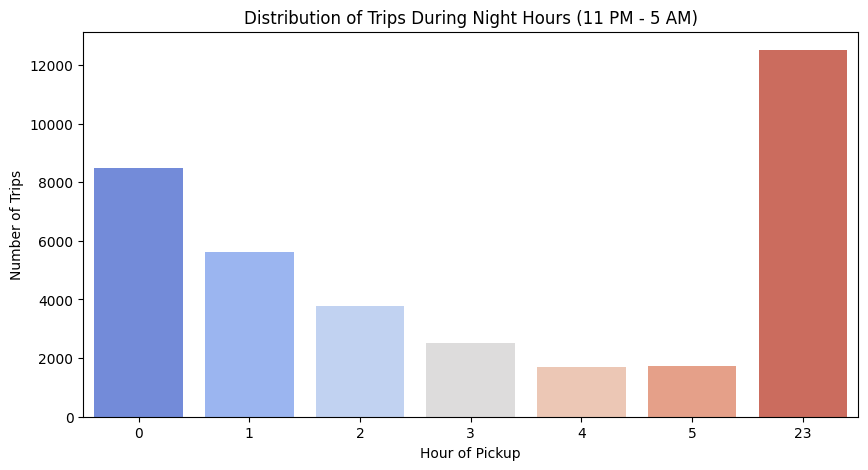

In [102]:
# Plot night trip distribution by hour
plt.figure(figsize=(10, 5))
sns.countplot(data=night_trips, x="pickup_hour", palette="coolwarm")
plt.xlabel("Hour of Pickup")
plt.ylabel("Number of Trips")
plt.title("Distribution of Trips During Night Hours (11 PM - 5 AM)")
plt.xticks(rotation=0)
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [103]:
# Analyse the fare per mile per passenger for different passenger counts
# Remove trips with zero distance or zero passengers (to avoid division errors)
valid_trips = tripdata_df[(tripdata_df["trip_distance"] > 0) & (tripdata_df["passenger_count"] > 0)]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Calculate fare per mile per passenger
valid_trips["fare_per_mile_per_passenger"] = valid_trips["fare_per_mile"] / valid_trips["passenger_count"]

# Group by passenger count and calculate statistics
fare_analysis = valid_trips.groupby("passenger_count")["fare_per_mile_per_passenger"].agg(["mean", "median", "std", "count"]).reset_index()

# Display results
print(fare_analysis)




   passenger_count       mean    median         std   count
0              1.0  10.368005  7.153846  108.157045  223416
1              2.0   6.321478  3.537037   84.180692   43100
2              3.0   4.025050  2.380952   43.446182   10810
3              4.0   4.146150  1.779412   59.562808    6009
4              5.0   1.629041  1.429603    5.538058    3801
5              6.0   1.335279  1.194444    1.248034    2451


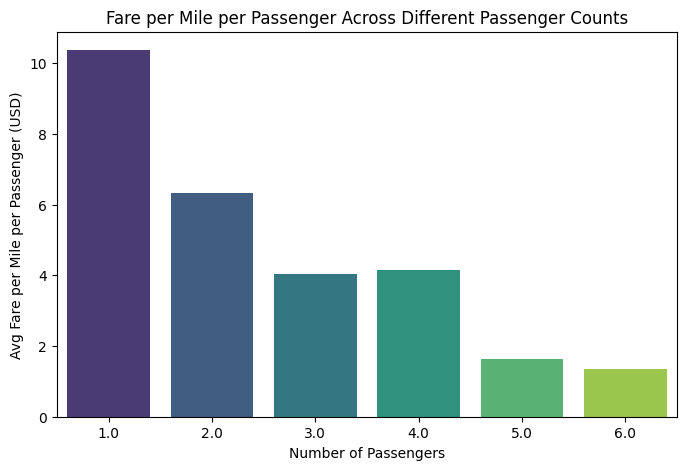

In [104]:
#Visualising the data for the fare per mile per passenger for different passenger counts
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_analysis, x="passenger_count", y="mean", palette="viridis")

plt.xlabel("Number of Passengers")
plt.ylabel("Avg Fare per Mile per Passenger (USD)")
plt.title("Fare per Mile per Passenger Across Different Passenger Counts")
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [105]:
# Compare the average fare per mile for different days and for different times of the day
# Compare the average fare per mile for different days and for different times of the day
# Remove trips with zero distance
valid_trips = tripdata_df[tripdata_df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Ensure 'pickup_day_name' is in valid_trips
valid_trips['pickup_day_name'] = valid_trips['tpep_pickup_datetime'].dt.day_name()

# Group by day of the week
fare_by_day = valid_trips.groupby("pickup_day_name")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Group by pickup hour
fare_by_hour = valid_trips.groupby("pickup_hour")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Display results
print(fare_by_day)
print(fare_by_hour)



  pickup_day_name       mean    median         std
0          Friday  10.696774  7.250000  124.233575
1          Monday   8.834979  6.882591   78.020149
2        Saturday  10.940246  7.066667  126.268157
3          Sunday  12.017496  6.480741  164.199316
4        Thursday  10.463522  7.440000  100.303201
5         Tuesday  11.256571  7.377049  118.332704
6       Wednesday  11.404065  7.427536  127.240561
    pickup_hour       mean    median         std
0             0   8.749909  6.000000   86.685656
1             1   9.780055  5.955556  127.681774
2             2   8.989739  5.890411   77.471333
3             3   7.236141  5.683453   15.750391
4             4   8.892846  5.205155   51.246355
5             5  14.682887  5.158371  167.915795
6             6   9.328681  5.691318   60.735604
7             7   9.280451  6.485667   90.463372
8             8   8.359501  7.247706   18.710469
9             9  10.501118  7.383178   94.756536
10           10  12.197166  7.529412  189.033622
11  

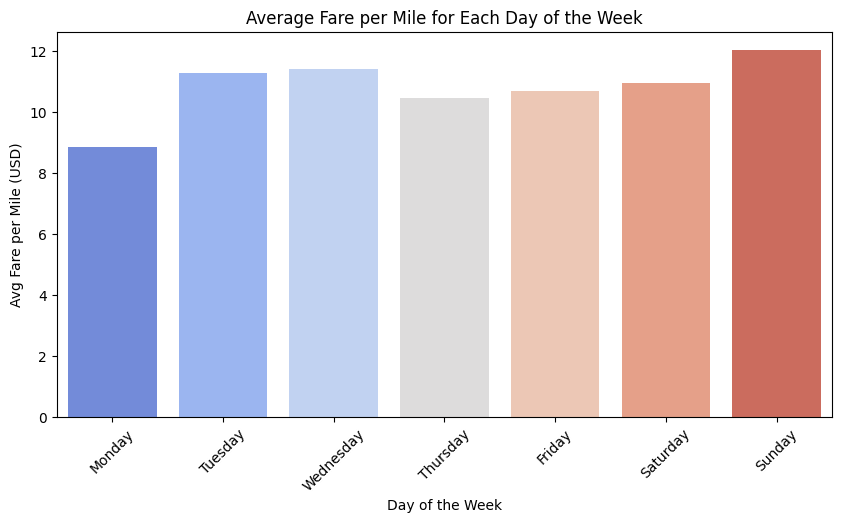

In [106]:
#Average Fare Per Mile for Each Day
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x="pickup_day_name", y="mean", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="coolwarm")

plt.xlabel("Day of the Week")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile for Each Day of the Week")
plt.xticks(rotation=45)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [107]:
# Compare fare per mile for different vendors
# Remove trips with zero distance
valid_trips = tripdata_df[tripdata_df["trip_distance"] > 0]

# Calculate fare per mile
valid_trips["fare_per_mile"] = valid_trips["fare_amount"] / valid_trips["trip_distance"]

# Group by VendorID
fare_by_vendor = valid_trips.groupby("VendorID")["fare_per_mile"].agg(["mean", "median", "std"]).reset_index()

# Display results
print(fare_by_vendor)




   VendorID       mean    median         std
0         1   8.132674  7.153846   11.052107
1         2  11.767320  7.129213  141.601882
2         6   5.924179  4.222573    8.035493


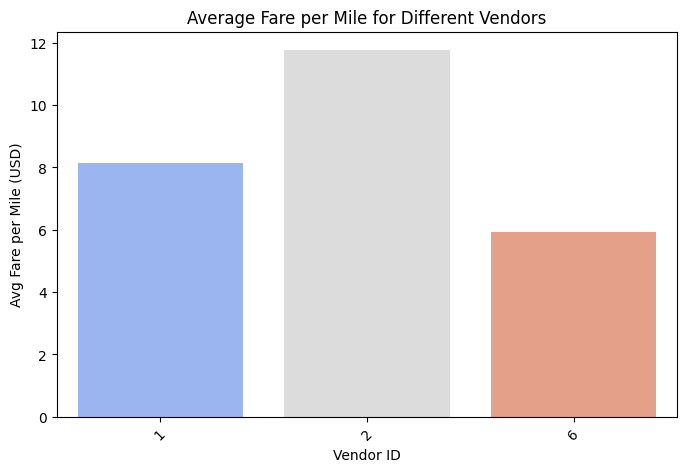

In [108]:
#Average Fare Per Mile For Each Vendor
plt.figure(figsize=(8, 5))
sns.barplot(data=fare_by_vendor, x="VendorID", y="mean", palette="coolwarm")

plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile (USD)")
plt.title("Average Fare per Mile for Different Vendors")
plt.xticks(rotation=45)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [109]:
# Defining distance tiers
#Categorizing Trips into Distance Tiers
# Define bins for distance tiers
bins = [0, 2, 5, 10, 20, float("inf")]
labels = ["0-2 miles", "2-5 miles", "5-10 miles", "10-20 miles", "20+ miles"]
# Defining distance tiers
#Categorizing Trips into Distance Tiers
# Define bins for distance tiers
bins = [0, 2, 5, 10, 20, float("inf")]
labels = ["0-2 miles", "2-5 miles", "5-10 miles", "10-20 miles", "20+ miles"]

# Create a new column for distance tiers
tripdata_df["distance_tier"] = pd.cut(tripdata_df["trip_distance"], bins=bins, labels=labels)


In [110]:
# Calculate fare per mile
tripdata_df["fare_per_mile"] = tripdata_df["fare_amount"] / tripdata_df["trip_distance"]

# Group by distance tier and calculate statistics
distance_fare_analysis = tripdata_df.groupby("distance_tier")["fare_per_mile"].agg(["mean", "median", "std", "count"]).reset_index()

# Display the results
print(distance_fare_analysis)

  distance_tier       mean    median         std   count
0     0-2 miles  14.996815  8.581560  164.381309  161372
1     2-5 miles   6.505440  6.208333    1.601456   81287
2    5-10 miles   4.828544  4.642857    0.939628   25848
3   10-20 miles   4.180481  4.049080    0.616301   22325
4     20+ miles   4.420157  3.461919    2.236067    3275


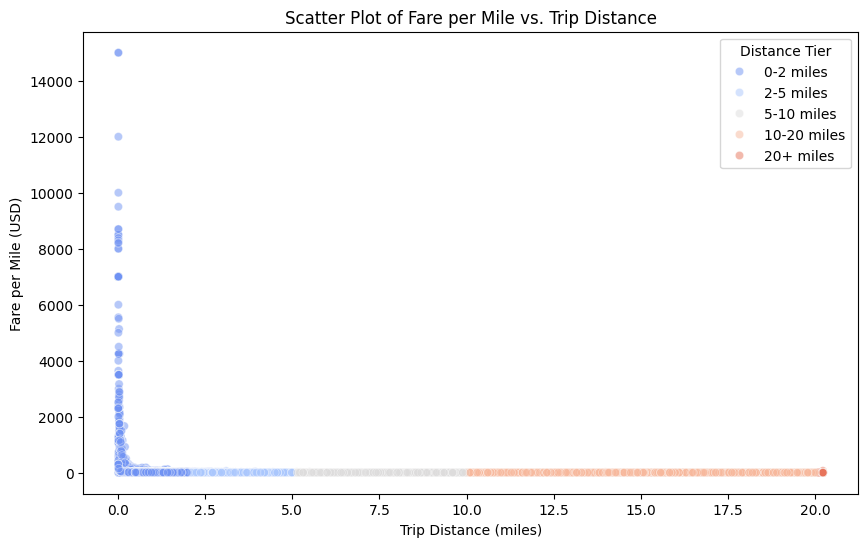

In [111]:
#Fare Per Mile Distribution Across Distance Tires
plt.figure(figsize=(10, 6))

sns.scatterplot(data=tripdata_df, x="trip_distance", y="fare_per_mile", hue="distance_tier", alpha=0.5, palette="coolwarm")

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare per Mile (USD)")
plt.title("Scatter Plot of Fare per Mile vs. Trip Distance")
plt.legend(title="Distance Tier")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

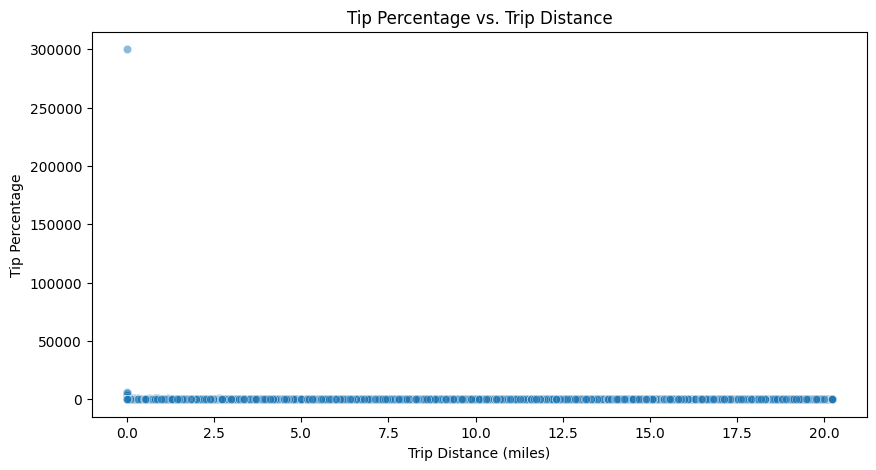

In [112]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
tripdata_df["tip_percentage"] = (tripdata_df["tip_amount"] / tripdata_df["fare_amount"]) * 100

plt.figure(figsize=(10, 5))
sns.scatterplot(data=tripdata_df, x="trip_distance", y="tip_percentage", alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Percentage")
plt.title("Tip Percentage vs. Trip Distance")
plt.show()



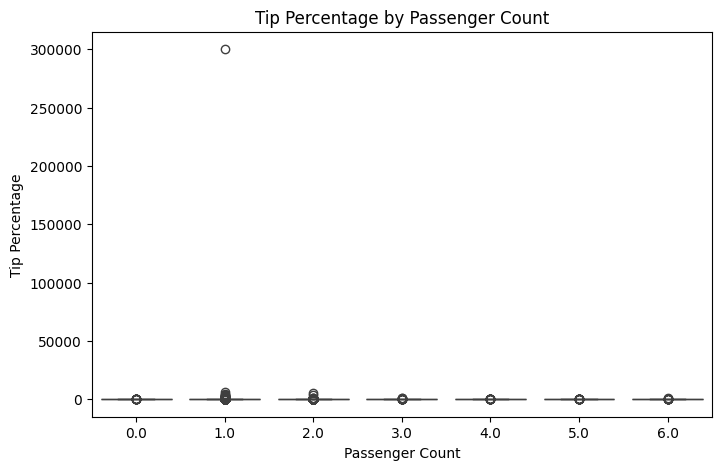

In [114]:
#Tip Percentage vs Passenger Count
plt.figure(figsize=(8, 5))
sns.boxplot(data=tripdata_df, x="passenger_count", y="tip_percentage")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage")
plt.title("Tip Percentage by Passenger Count")
plt.show()

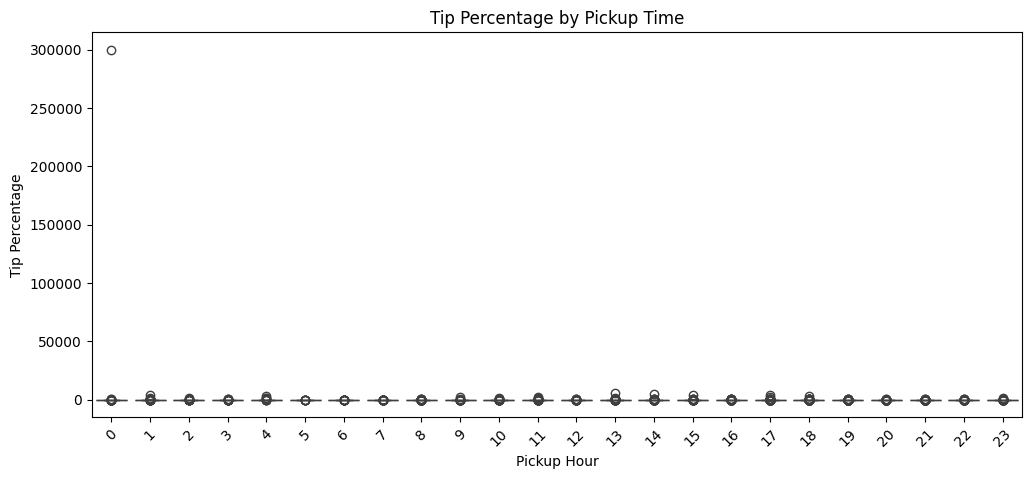

In [115]:
#Tip Percentage by Pickup Hour
plt.figure(figsize=(12, 5))
sns.boxplot(data=tripdata_df, x="pickup_hour", y="tip_percentage")
plt.xlabel("Pickup Hour")
plt.ylabel("Tip Percentage")
plt.title("Tip Percentage by Pickup Time")
plt.xticks(rotation=45)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [118]:
tripdata_df["tip_category"] = pd.cut(tripdata_df["tip_percentage"],
                                 bins=[-1, 10, 25, 100],
                                 labels=["Low (<10%)", "Medium (10-25%)", "High (>25%)"])

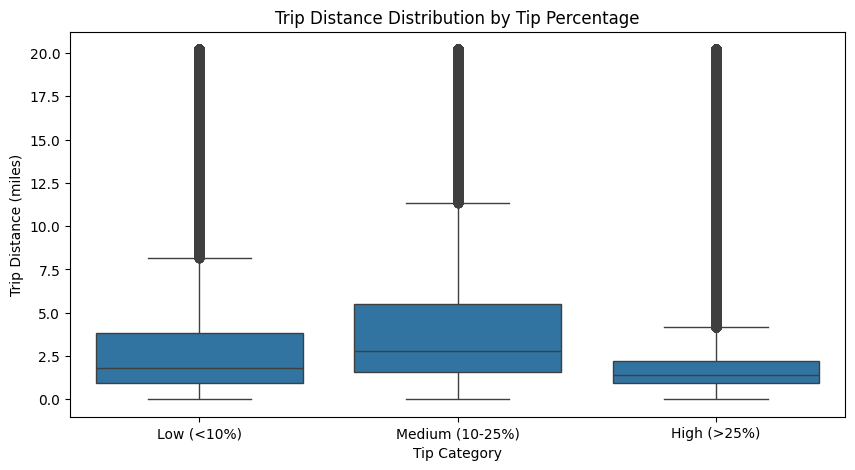

In [119]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
plt.figure(figsize=(10, 5))
sns.boxplot(data=tripdata_df, x="tip_category", y="trip_distance")
plt.xlabel("Tip Category")
plt.ylabel("Trip Distance (miles)")
plt.title("Trip Distance Distribution by Tip Percentage")
plt.show()




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

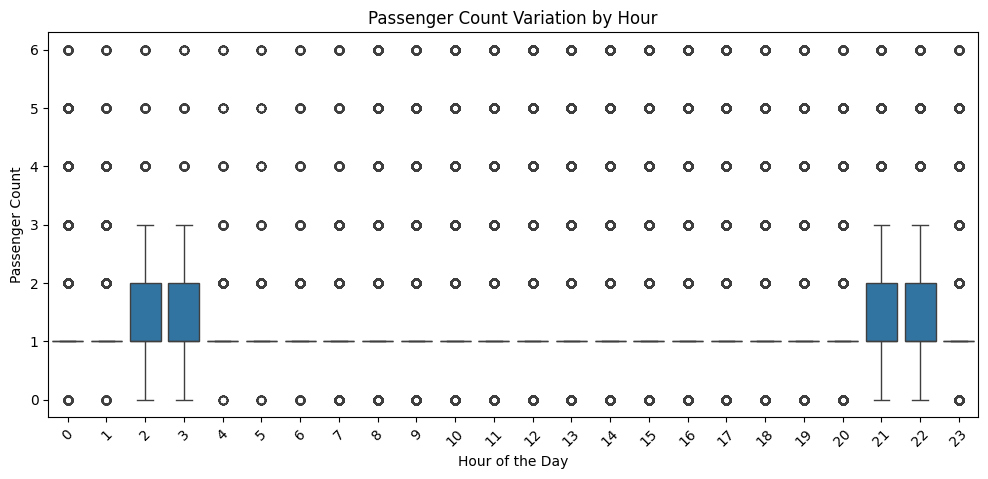

In [120]:
# See how passenger count varies across hours and days
plt.figure(figsize=(12, 5))
sns.boxplot(data=tripdata_df, x="pickup_hour", y="passenger_count")
plt.xlabel("Hour of the Day")
plt.ylabel("Passenger Count")
plt.title("Passenger Count Variation by Hour")
plt.xticks(rotation=45)
plt.show()





**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

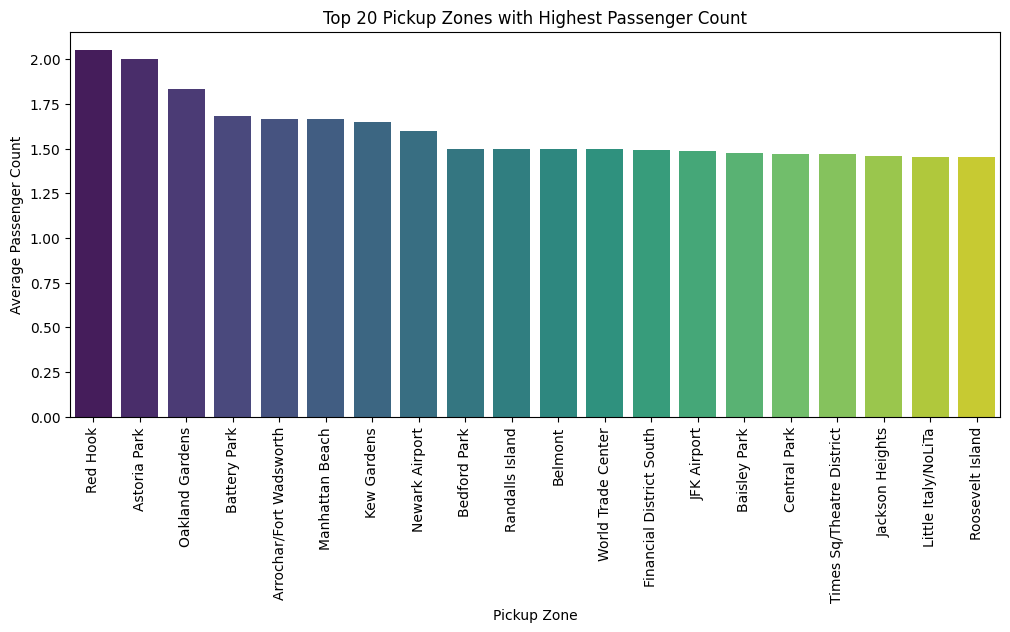

In [121]:
# How does passenger count vary across zones
top_zones = tripdata_df.groupby("pickup_zone")["passenger_count"].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_zones.index, y=top_zones.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Pickup Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Pickup Zones with Highest Passenger Count")
plt.show()



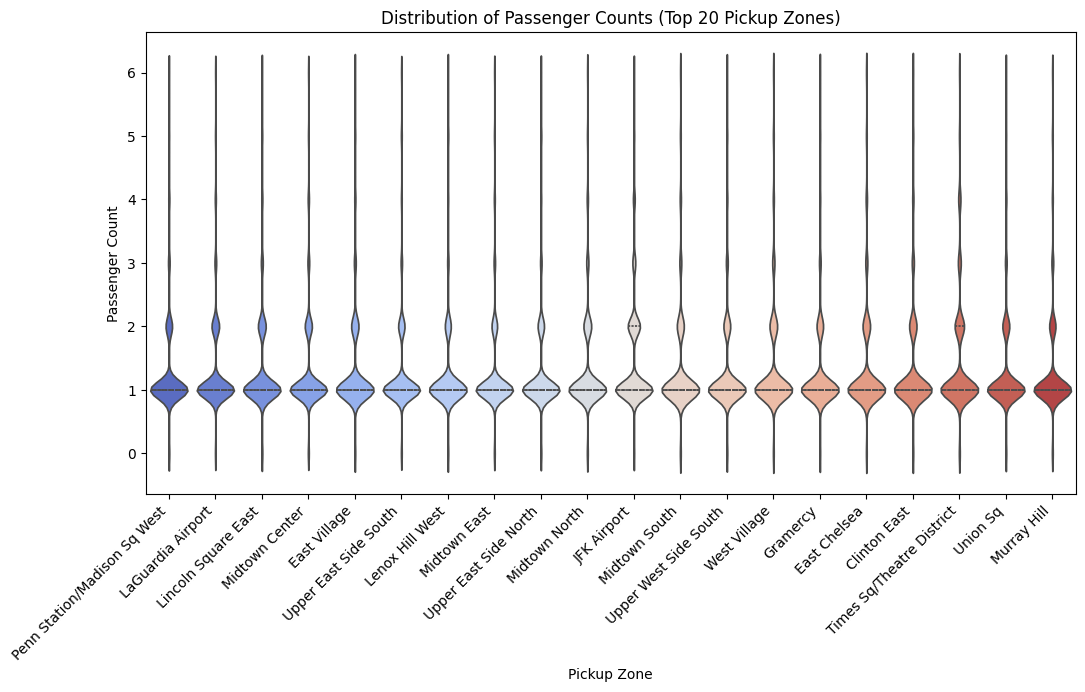

In [122]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Find the top 20 zones with the highest number of pickups
top_zones = tripdata_df["pickup_zone"].value_counts().nlargest(20).index

# Filter the trip data to only include trips from the top zones
filtered_trips = tripdata_df[tripdata_df["pickup_zone"].isin(top_zones)]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_trips, x="pickup_zone", y="passenger_count", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Pickup Zone")
plt.ylabel("Passenger Count")
plt.title("Distribution of Passenger Counts (Top 20 Pickup Zones)")
plt.show()




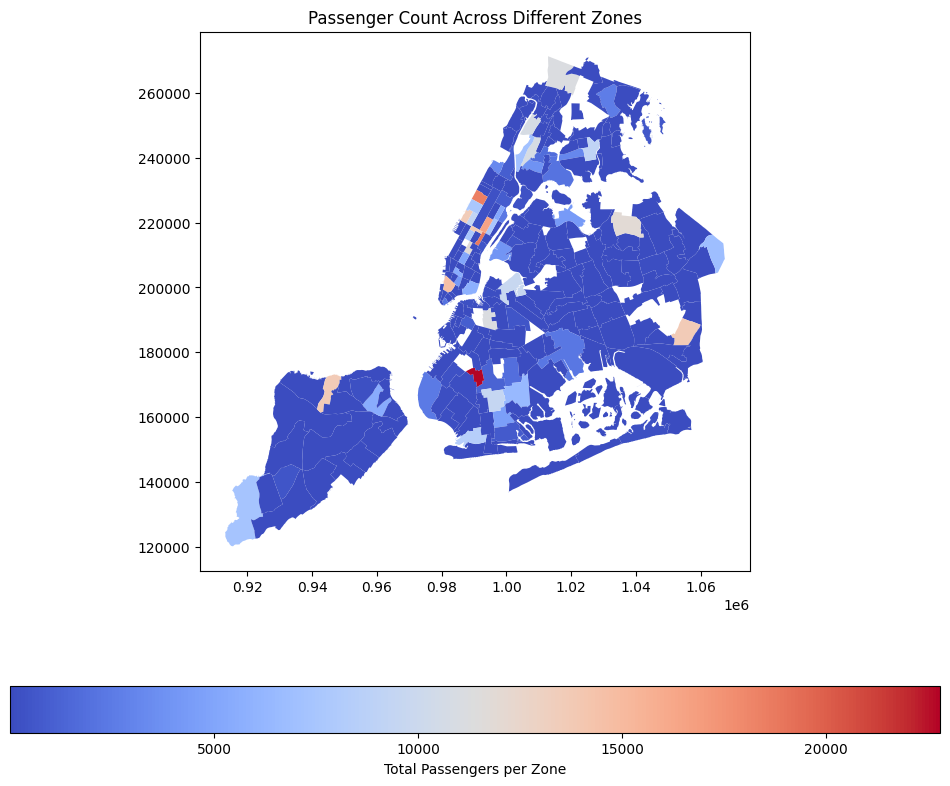

In [123]:
#Passenger Count Across Zones
# Aggregate total passengers per zone
taxi_zone["total_passengers"] = tripdata_df.groupby("PULocationID")["passenger_count"].sum()

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
taxi_zone.plot(column="total_passengers", ax=ax, cmap="coolwarm", legend=True,
           legend_kwds={'label': "Total Passengers per Zone", 'orientation': "horizontal"})
plt.title("Passenger Count Across Different Zones")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

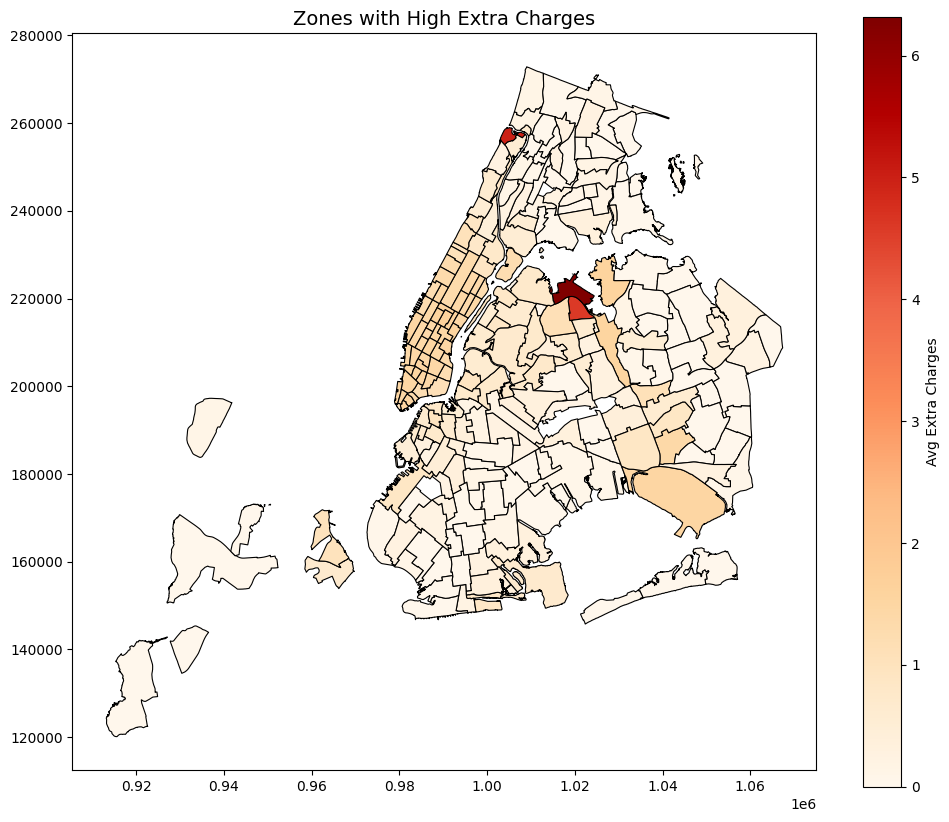

In [124]:
# How often is each surcharge applied?

#Top Zones with High Extra Charges
# Group by pickup zone and calculate average extra charges
zone_extra_charges = tripdata_df.groupby("PULocationID")["extra"].mean().reset_index()

# Merge with taxi_zones GeoDataFrame for mapping
taxi_zones_extra = taxi_zone.merge(zone_extra_charges, left_on="LocationID", right_on="PULocationID")

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
taxi_zones_extra.plot(column="extra", cmap="OrRd", linewidth=0.8, edgecolor="k",
                      legend=True, legend_kwds={"label": "Avg Extra Charges", "orientation": "vertical"},
                      ax=ax)
ax.set_title("Zones with High Extra Charges", fontsize=14)
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [126]:
# Recommendations to optimize routing and dispatching

# Based on the analysis, here are recommendations to optimize routing and dispatching:

# 1. Demand-Based Deployment:
#    - Analyze hourly and daily demand patterns to strategically position taxis.
#    - Increase taxi density in high-demand zones during peak hours (e.g., evenings, weekends).
#    - Redistribute taxis from low-demand areas to high-demand areas dynamically.
#    - Consider implementing a surge pricing mechanism during peak hours to incentivize drivers to operate in high-demand zones and balance supply and demand.


# 2. Predictive Routing:
#    - Use historical data and real-time information to predict potential hotspots and congestion areas.
#    - Optimize routes dynamically based on real-time traffic conditions, avoiding congested areas.
#    - Implement a real-time monitoring system for traffic and adjust routes as necessary.
#    - Consider machine learning models to predict traffic flow and travel times to suggest optimized routes.

# 3. Optimized Dispatching:
#    - Prioritize trips based on demand, distance, and driver availability to minimize wait times.
#    - Develop a dispatch system that considers real-time traffic patterns and driver location to assign trips efficiently.
#    - Implement a system to match riders with nearby available taxis quickly.

# 4. Time-Based Pricing:
#    - Implement variable pricing based on time of day and day of the week. Charge more during peak hours and less during off-peak hours.
#    - Consider implementing lower fares during night hours to increase the supply of drivers during those hours.

# 5. Zone-Specific Strategies:
#    - Focus on high-traffic zones for optimization, particularly during peak hours.
#    - Identify zones with high pickup/dropoff ratios and ensure sufficient taxi supply.
#    - Address areas with consistently low demand by offering incentives or reducing the supply in these areas.

# 6. Customer Segmentation:
#    - Analyze passenger count and tip data to identify different customer segments.
#    - Offer tailored services to different customer segments, adjusting dispatching and pricing strategies accordingly.

# 7. Vendor Performance Analysis:
#    - Evaluate the performance of different vendors in terms of fare rates and efficiency.
#    - Compare vendors' average fare per mile for different distances and identify areas for improvement.

# 8. Consider External Factors:
#    - Account for events or holidays that could impact traffic patterns and adjust taxi deployment and pricing accordingly.
#    - Stay up-to-date with local events and news that could affect travel demand.
#    - Leverage weather data to predict demand fluctuations and adjust operations.

# By implementing these strategies, the taxi service can enhance its efficiency, meet customer demand more effectively, improve driver earnings and enhance overall customer satisfaction.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [127]:
# Recommendations on strategically positioning cabs based on insights:

# 1. Time-Based Deployment:
#    - During peak hours (evenings, weekends), concentrate more cabs in high-demand zones identified in the analysis (top 10 pickup/dropoff zones).
#    - During night hours (11 PM to 5 AM), strategically position cabs in the top 10 night pickup/dropoff zones.
#    - Consider a lower supply of cabs in low-demand zones during off-peak hours to optimize resource utilization.


# 2. Day-of-the-Week Adjustments:
#    - Analyze the average fare per mile by day of the week. Deploy more cabs on days with higher fares and demand.
#    - Adjust the number of cabs based on day-specific patterns. For example, more cabs may be needed on Fridays and Saturdays compared to weekdays.

# 3. Zone-Specific Strategies:
#    - Focus on high-traffic zones identified through the analysis, especially during peak hours.
#    - In zones with high passenger counts and higher tip percentages, maintain sufficient cab supply to meet demand and incentivize higher earnings for drivers.

# 4. Distance-Tiered Deployment:
#    - Analyze fare per mile for different distance tiers.
#    - Adjust cab positioning to optimize for longer trips (greater than 5 miles), potentially deploying more cabs from origin zones with many long-distance trips.

# 5. Dynamic Adjustments:
#    - Use real-time data and predictive models to anticipate changes in demand (e.g., events, weather).
#    - Dynamically adjust cab positions in response to real-time demand surges, directing cabs to areas experiencing rapid increases in trip requests.


# 6. Vendor-Specific Strategies:
#    - Analyze the average fare per mile for different vendors. For higher-performing vendors, optimize their deployment in areas where they are more competitive, considering customer preferences.

# 7. Surge Pricing Optimization:
#    - Implement surge pricing during high-demand periods (peak hours, specific zones, or days).
#    - Use surge pricing strategically to incentivize drivers and balance supply and demand.

# 8. Consider Extra Charges:
#     - Understand the prevalence of extra charges in different zones and times.
#     - Adjust pricing strategies and ensure drivers are aware of these patterns to adjust accordingly.
#     - Ensure adequate supply in zones with frequent extra charges so that riders are not inconvenienced by excessive wait times.

# Implementation:
# - Integrate these strategies into the cab dispatch system.
# - Use real-time data feeds to monitor demand and adjust cab positions dynamically.
# - Regularly review and update strategies based on new data and insights.




**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [128]:
# Pricing Strategy Adjustments

# 1. Time-Based Pricing:
#    - Implement dynamic pricing based on time of day and day of the week.
#    - Increase prices during peak hours (e.g., evenings, Fridays and Saturdays) and reduce them during off-peak hours.
#    - Analyze the 'fare_by_hour' and 'fare_by_day' dataframes to identify optimal price adjustments for each time period.

# 2. Distance-Tiered Pricing:
#    - Refine the existing distance-tiered pricing based on the 'distance_fare_analysis'.
#    - Adjust prices for different distance tiers to maximize revenue without pricing out customers.
#    - Consider competitive pricing for shorter distances (0-2 miles), while potentially increasing prices for longer trips (5+ miles) if market analysis allows.

# 3. Zone-Based Pricing:
#    - Introduce zone-based surcharges or discounts.
#    - Identify high-demand zones with high average fares per mile and apply a moderate surcharge.
#    - Offer discounts in low-demand zones to incentivize both riders and drivers.
#    - Use the 'top_zones' analysis and the map visualizing 'total_passengers' to identify zones for adjustments.

# 4. Passenger Count Adjustments:
#    - Analyze the fare_analysis dataframe to determine appropriate fare adjustments based on passenger count.
#    - For instance, if the fare per mile per passenger is significantly lower for larger groups, consider a slight increase to maximize revenue per trip.
#    - However, be mindful of maintaining competitiveness in the market.

# 5. Vendor Competitiveness Analysis:
#    - Use the 'fare_by_vendor' analysis.
#    - Compare prices with competitors, and adjust rates accordingly to stay competitive while maximizing profits.
#    - If a vendor has consistently lower average fares per mile, identify opportunities to increase prices without losing market share.

# 6. Consider Extra Charges:
#    - The analysis of zones with high extra charges provides opportunities.
#    - If extra charges are frequent in specific areas and times, analyze if this extra can be increased without negatively affecting the volume of riders or if a competitor is charging a lower rate.


# Implementation:
# - Develop a pricing model that incorporates these adjustments.
# - Regularly monitor market prices and adjust pricing strategies as needed.
# - A/B testing different pricing scenarios can provide data-driven insights for continuous improvement.
# - Evaluate the impact of pricing changes on key performance indicators (KPIs) such as revenue, ridership, and driver earnings.
